<a href="https://colab.research.google.com/github/WojciechSokolowski/Qiskit_Projects/blob/main/lab_1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Qiskit

!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]

# Part I: Introduction to Qiskit
Welcome to Qiskit! Before starting with the exercises, please run the cell below by pressing 'shift' + 'return'.
You can run the other following cells in the same way.

Credits: Adopted from IBM Qiskit materials

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector, Operator
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere, plot_distribution
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator
from qiskit.providers.basic_provider import BasicProvider
from qiskit.circuit.library import UGate
from qiskit.primitives import Sampler
backend = BasicProvider().get_backend('basic_simulator')
import numpy as np
from numpy import sqrt, pi, random

## I.1: Basic Rotations on One Qubit and Measurements on the Bloch Sphere

Before getting into complicated circuits on many qubits, let us start by looking at a single qubit. Read this chapter: https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems
https://learning.quantum.ibm.com/course/basics-of-quantum-information/quantum-circuits

It will help you to learn the basics about the Bloch sphere, Pauli operators, as well as the Hadamard gate and the $S$ and $S^\dagger$ gates.

By default, states in Qiskit start in $|0\rangle$, which corresponds to "arrow up" on the Bloch sphere. Play around with the gates $X$, $Y$, $Z$, $H$, $S$ and $S^\dagger$ to get a feeling for the different rotations. To do so, insert combinations of the following code lines in the lines indicated in the program:

    qc.x(0)    # rotation by Pi around the x-axis
    qc.y(0)    # rotation by Pi around the y-axis
    qc.z(0)    # rotation by Pi around the z-axis
    qc.s(0)    # rotation by Pi/2 around the z-axis
    qc.sdg(0)  # rotation by -Pi/2 around the z-axis
    qc.h(0)    # rotation by Pi around an axis located halfway between x and z
    qc.rx(alpha, 0) # rotation by alpha around the x-axis
    qc.ry(alpha, 0) # rotation by alpha around the y-axis
    qc.rz(alpha, 0) # rotation by alpha around the z-axis

Try to reach the given state in the Bloch sphere in each of the following exercises by applying the correct rotations. (Press Shift + Enter to run a code cell). In each case print the output state using Latex, represent the state on the Bloch sphere and corresponding density matrix using histograms.
### 1.) Let us start easy by performing a bit flip. The goal is to reach the state $|1\rangle$.

<div><img src="attachment:state1.png" width="200"></div>

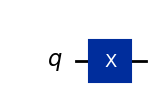

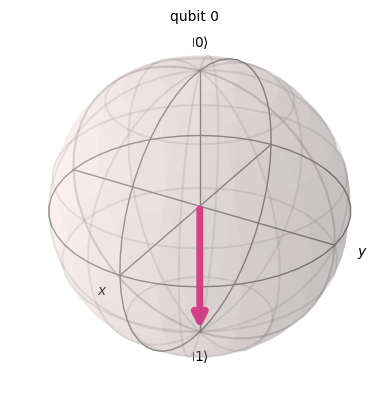

<IPython.core.display.Latex object>

In [ ]:
def lab1_ex1():
    qc = QuantumCircuit(1)
    qc.x(0)
    return qc
qc = lab1_ex1()
display(qc.draw('mpl'))
display(plot_bloch_multivector(qc))
print("\n")
display(Statevector.from_instruction(qc).draw('latex'))

### 2.) Next, we would like to create superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$.

<div><img src="attachment:plusstate.png" width="200"></div>

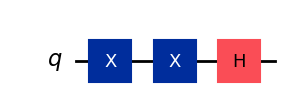

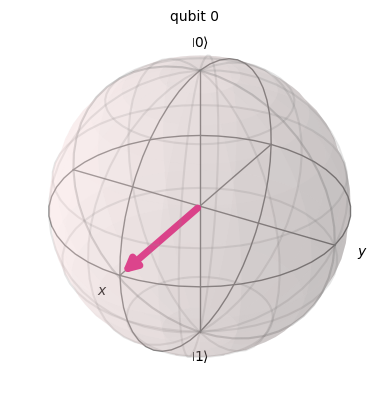

<IPython.core.display.Latex object>

In [ ]:
def lab1_ex2():
    qc = QuantumCircuit(1)
    qc = lab1_ex1()
    # in one step
    #qc.ry(-pi/2,0)
    qc.x(0)
    qc.h(0)


    return qc
qc = lab1_ex2()
display(qc.draw('mpl'))
display(plot_bloch_multivector(qc))
display(Statevector.from_instruction(qc).draw('latex'))

### 3.) Let's combine the two operations seen before. The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$.

<div><img src="attachment:minusstate.png" width="200"></div>

Can you even come up with different ways?

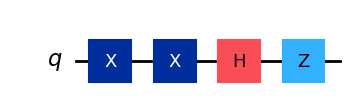

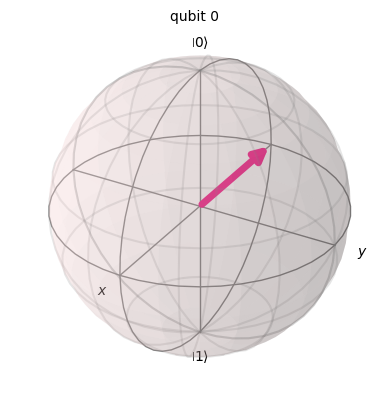

<IPython.core.display.Latex object>

In [ ]:
def lab1_ex3():
    qc = QuantumCircuit(1)
    qc = lab1_ex2()
    qc.z(0)
    return qc
qc = lab1_ex3()
display(qc.draw('mpl'))
display(plot_bloch_multivector(qc))
print("\n")
display(Statevector.from_instruction(qc).draw('latex'))

### 4.) Next, we move on to the complex numbers. The goal is to reach the state $|- i\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$.

<div><img src=attachment:leftstate.png width="200"></div>

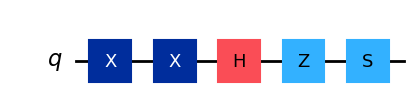

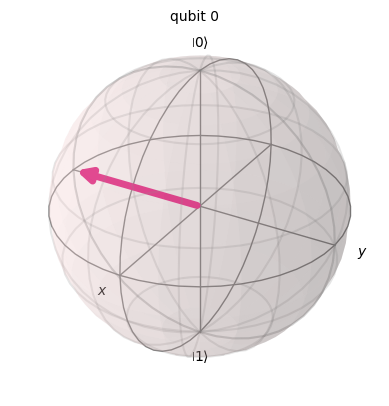

<IPython.core.display.Latex object>

In [ ]:
def lab1_ex4():
    qc = QuantumCircuit(1)
    qc=lab1_ex3()
    qc.s(0)
    return qc

qc = lab1_ex4()
display(qc.draw('mpl'))
display(plot_bloch_multivector(qc))
display(Statevector.from_instruction(qc).draw('latex'))

### 5.) Next, the goal is to reach the state $|1\rangle$.

<div><img src=attachment:leftstate.png width="200"></div>

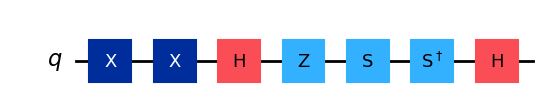

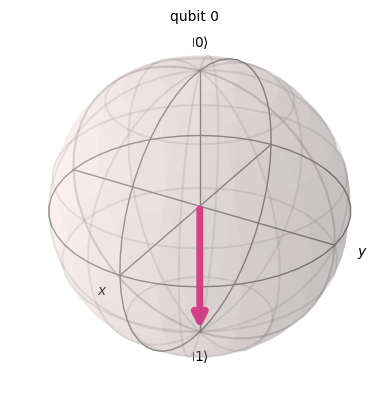

<IPython.core.display.Latex object>

In [ ]:
def lab1_ex5():
    qc = QuantumCircuit(1)
    qc = lab1_ex4()
    qc.sdg(0)
    qc.h(0)

    return qc

qc = lab1_ex5()
display(qc.draw('mpl'))
display(plot_bloch_multivector(qc))
display(Statevector.from_instruction(qc).draw('latex'))

## I.2: Quantum Circuits Using Multi-Qubit Gates
Great job! Now that you've understood the single-qubit gates, let us look at gates on multiple qubits. Check out this chapter if you would like to refresh the theory: https://learning.quantum.ibm.com/course/basics-of-quantum-information/multiple-systems


The basic gates on two and three qubits are given by

    qc.cx(c,t)       # controlled-X (= CNOT) gate with control qubit c and target qubit t
    qc.cz(c,t)       # controlled-Z gate with control qubit c and target qubit t
    qc.ccx(c1,c2,t)  # controlled-controlled-X (= Toffoli) gate with control qubits c1 and c2 and target qubit t
    qc.swap(a,b)     # SWAP gate that swaps the states of qubit a and qubit b

We start with an easy gate on two qubits, the controlled-NOT (also CNOT) gate. The CNOT gate has no effect when applied on two qubits in state $|0\rangle$, but this changes if we apply a Hadamard gate before to the control qubit to bring it in superposition. This way, we can create entanglement. The resulting state is one of the so-called Bell states. There are four Bell states in total, so let's try to also construct another one:


### 6.) Construct the Bell state $|\Psi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$. Draw the cricuit and show that indeed the circuit generates entangled $|\Psi^+\rangle$ from initial state $|00\rangle$

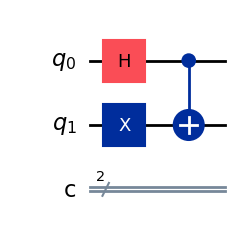

<IPython.core.display.Latex object>

In [ ]:
def lab1_ex6():
    # This time, we not only want two qubits, but also two classical bits for the measurement
    qc = QuantumCircuit(2,2)
    qc.h(0)
    qc.x(1)

    qc.cx(0,1)

    return qc
#Draw the crcuit, plot histogram representation matrix of output state and latex representation
qc=lab1_ex6()
display(qc.draw('mpl'))
display(Statevector.from_instruction(qc).draw('latex'))

Add a measurement to the above circuit so that we can execute it (using the simulator) and plot the histogram of the corresponding counts.

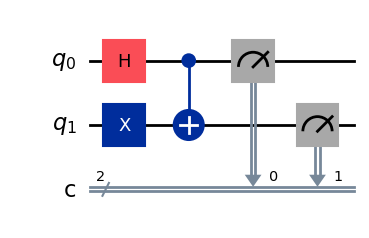

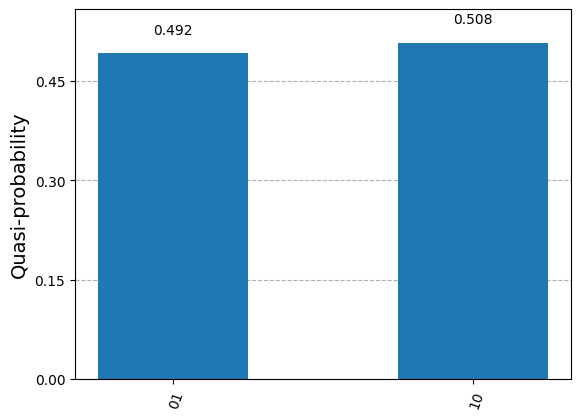

In [ ]:
qc.measure(0,0)
qc.measure(1,1)
display(qc.draw('mpl'))
results = Sampler().run(qc).result()
results = Sampler().run(qc, shots=1024).result()
display(plot_histogram(results.quasi_dists[0].binary_probabilities()))


### 6.a) Construct the Bell state $|\Phi^-\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle - |11\rangle\right)$. Draw the cricuit and show that indeed the circuit generates entangled $|\Phi^-\rangle$ from initial state $|00\rangle$

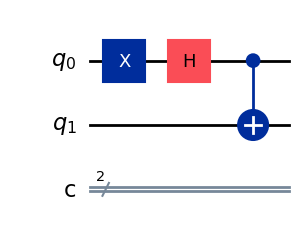

<IPython.core.display.Latex object>

In [ ]:
def lab1_ex6a():
    # This time, we not only want two qubits, but also two classical bits for the measurement
    qc = QuantumCircuit(2,2)
    qc.x(0)
    qc.h(0)

    qc.cx(0,1)

    return qc
#Draw the crcuit, plot histogram representation matrix of output state and latex representation
qc=lab1_ex6a()
display(qc.draw('mpl'))
display(Statevector.from_instruction(qc).draw('latex'))

Add a measurement to the above circuit so that we can execute it (using the simulator) and plot the histogram of the corresponding counts.

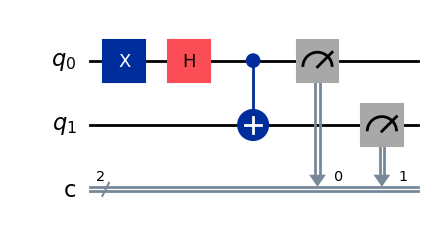

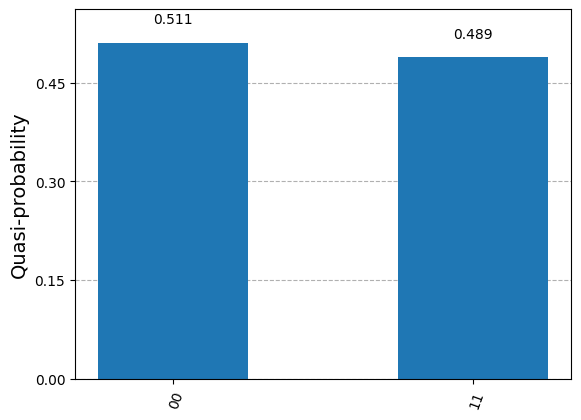

In [ ]:
qc.measure(0,0)
qc.measure(1,1)
display(qc.draw('mpl'))
results = Sampler().run(qc).result()
results = Sampler().run(qc, shots=1024).result()
display(plot_histogram(results.quasi_dists[0].binary_probabilities()))


### 7.a) Write a function that builds a quantum circuit on 3 qubits and creates the GHZ state, $|\Psi\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$.

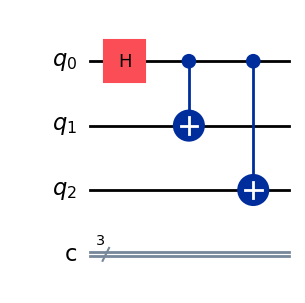

<IPython.core.display.Latex object>

In [ ]:
def lab1_ex7a():
    # This time, we need 3 qubits and also add 3 classical bits in case we want to measure
    qc = QuantumCircuit(3,3)

    qc.h(0)

    qc.cx(0,1)
    qc.cx(0,2)

    return qc

qc=lab1_ex7a()
display(qc.draw('mpl'))
display(Statevector.from_instruction(qc).draw('latex'))


Measure this circuit the same way as before.

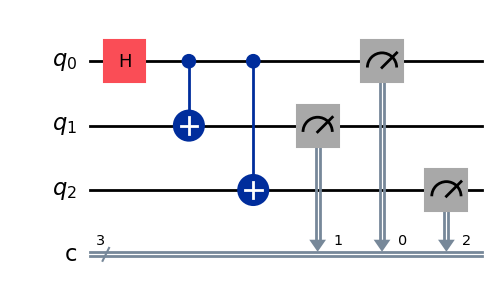

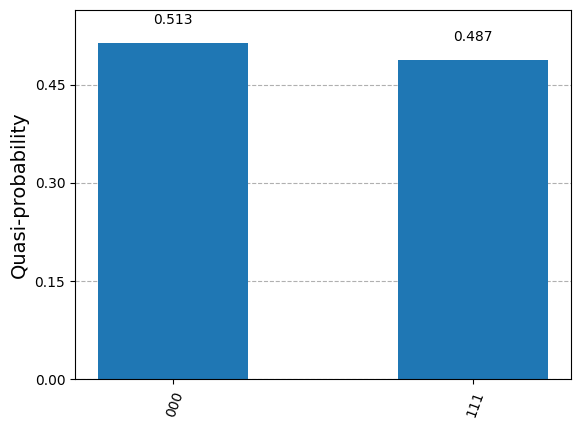

In [ ]:
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

display(qc.draw('mpl'))
results = Sampler().run(qc).result()
results = Sampler().run(qc, shots=1024).result()
display(plot_histogram(results.quasi_dists[0].binary_probabilities()))


### 7.b) Write a function that builds a quantum circuit on 3 qubits and creates the GHZ-like state, $|\Psi\rangle = \frac{1}{\sqrt{2}} \left(|011\rangle - |100 \rangle \right)$.

<div><img src="attachment:ghz_circuit.png" width="200"></div>

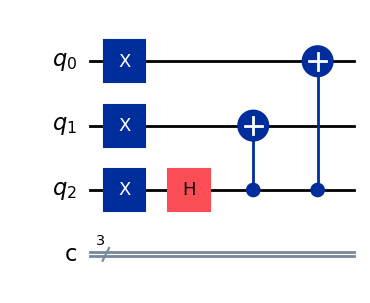

<IPython.core.display.Latex object>

In [ ]:
def lab1_ex7b():
    # This time, we need 3 qubits and also add 3 classical bits in case we want to measure
    qc = QuantumCircuit(3,3)

    qc.x(2)
    qc.h(2)
    qc.x(1)
    qc.x(0)

    qc.cx(2,1)
    qc.cx(2,0)

    return qc


qc=lab1_ex7b()
display(qc.draw('mpl'))
display(Statevector.from_instruction(qc).draw('latex'))


Measure this circuit the same way  before.

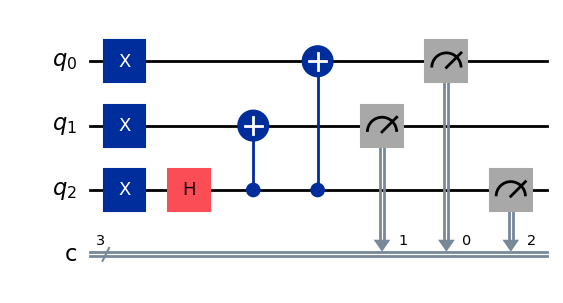

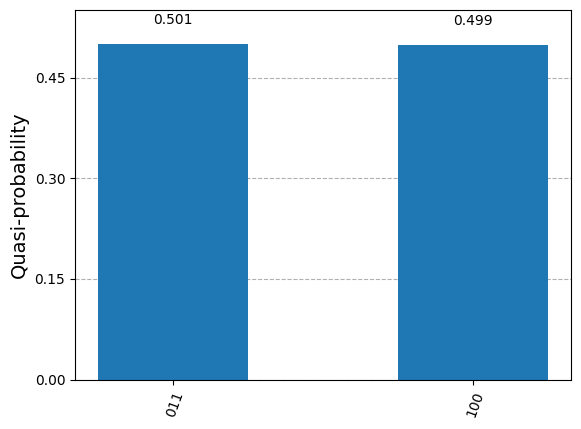

In [ ]:
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

display(qc.draw('mpl'))
results = Sampler().run(qc).result()
results = Sampler().run(qc, shots=1024).result()
display(plot_histogram(results.quasi_dists[0].binary_probabilities()))
